In [11]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#ACQUIRE
def acquire():
    data = pd.read_csv('../source/2019-04-metropolitan-street.csv',encoding = "latin1")
    return data

In [3]:
dfCrimes = acquire()
dfCrimes.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,c85e275201ddef144a14221d896e996fc50bb81453082a...,2019-04,Metropolitan Police Service,Metropolitan Police Service,-1.256562,53.127231,On or near Penn Street,E01027978,Ashfield 004D,Violence and sexual offences,Under investigation,NaN
1,73e345f607f6adbd9fb1da407d155183a73a553dcde1aa...,2019-04,Metropolitan Police Service,Metropolitan Police Service,0.757016,52.026169,On or near Guy Cook Close,E01029890,Babergh 008E,Violence and sexual offences,Under investigation,NaN
2,NaN,2019-04,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2019-04,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2019-04,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN


In [4]:
#It shows the dataframe, showing the total nums of nulls and no-nulls, number of rows, 
def describe(df):
    print("[Total rows, Total Columns]: ",df.shape)
    totalrows = df.shape
    totalrows = totalrows[0]
    print("\nTotalrows: ", totalrows)

    description = df.count() #what is not null and have value
    print("\nDescription of the table with no nulls values\n",description)

    columns_nulls = df.isnull().sum()

    print("\nDescription of the table with nulls values:\n",columns_nulls)

    columnsNames = df.columns
    print(columnsNames)

    df.head()

    return {'totalrows' : totalrows, 'columns_name' : columnsNames}

littleDescription = describe(dfCrimes)   


[Total rows, Total Columns]:  (91858, 12)

Totalrows:  91858

Description of the table with no nulls values
 Crime ID                 72425
Month                    91858
Reported by              91858
Falls within             91858
Longitude                90369
Latitude                 90369
Location                 91858
LSOA code                90369
LSOA name                90369
Crime type               91858
Last outcome category    72425
Context                      0
dtype: int64

Description of the table with nulls values:
 Crime ID                 19433
Month                        0
Reported by                  0
Falls within                 0
Longitude                 1489
Latitude                  1489
Location                     0
LSOA code                 1489
LSOA name                 1489
Crime type                   0
Last outcome category    19433
Context                  91858
dtype: int64
Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
   

In [5]:
#WRANGLING

#Drop columns if the number of nulls rise over a given %
def dropColumns(df, percent, description):
    #return lambda df, percent, description: df for column in df[description['columns_name']] if (df[column].isnull().sum() * 100 / description['totalrows'] >= percent)

    for column in df[description['columns_name']]:
        result = df[column].isnull().sum() * 100 / description['totalrows']
        if result >= percent:
            del df[column]
    #df.head(5)
    return df

dfCrimes = dropColumns(dfCrimes, 90, littleDescription)
dfCrimes.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,c85e275201ddef144a14221d896e996fc50bb81453082a...,2019-04,Metropolitan Police Service,Metropolitan Police Service,-1.256562,53.127231,On or near Penn Street,E01027978,Ashfield 004D,Violence and sexual offences,Under investigation
1,73e345f607f6adbd9fb1da407d155183a73a553dcde1aa...,2019-04,Metropolitan Police Service,Metropolitan Police Service,0.757016,52.026169,On or near Guy Cook Close,E01029890,Babergh 008E,Violence and sexual offences,Under investigation
2,NaN,2019-04,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN
3,NaN,2019-04,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN
4,NaN,2019-04,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN


In [6]:
#WRANGLING2
#As there is only the column 'Context' droped by "dropColumns" function, I need to eliminate not useful columns by hand
def dropany(df, columnlist):
    #df.drop(columns=['Crime ID','Unnamed: 23'])
    df.drop(columns = columnlist, inplace=True)
    return df
    
dfCrimes = dropany(dfCrimes, ['Crime ID', 'Reported by', 'Falls within', 'Longitude', 'Latitude', 'Last outcome category'])
dfCrimes.head()

,Month,Location,LSOA code,LSOA name,Crime type
0,2019-04,On or near Penn Street,E01027978,Ashfield 004D,Violence and sexual offences
1,2019-04,On or near Guy Cook Close,E01029890,Babergh 008E,Violence and sexual offences
2,2019-04,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour
3,2019-04,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour
4,2019-04,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour


In [7]:
#WRANGLING3
#Match the patern and remplace by no space
def paterntocero(df, column, patern):
    df[column] = df[column].str.replace(patern,"")
    return df




#Column "LSOA name" consists in the name of the disctric and the number that helps to identificate, but actually 
#"LSOA code" is the distric code, so we want to erase the last part of "LSOA name" to get the distric
patern = (r"(\s\d{3}\w{1})")
dfCrimes = paterntocero(dfCrimes, 'LSOA name', patern)
dfCrimes.head()


,Month,Location,LSOA code,LSOA name,Crime type
0,2019-04,On or near Penn Street,E01027978,Ashfield,Violence and sexual offences
1,2019-04,On or near Guy Cook Close,E01029890,Babergh,Violence and sexual offences
2,2019-04,On or near Beansland Grove,E01000027,Barking and Dagenham,Anti-social behaviour
3,2019-04,On or near Mead Grove,E01000027,Barking and Dagenham,Anti-social behaviour
4,2019-04,On or near Mead Grove,E01000027,Barking and Dagenham,Anti-social behaviour


In [8]:
#In "Location" there is no useful to know if it is near or not 
patern = ("On or near ")
dfCrimes = paterntocero(dfCrimes, 'Location', patern)
dfCrimes.head()

,Month,Location,LSOA code,LSOA name,Crime type
0,2019-04,Penn Street,E01027978,Ashfield,Violence and sexual offences
1,2019-04,Guy Cook Close,E01029890,Babergh,Violence and sexual offences
2,2019-04,Beansland Grove,E01000027,Barking and Dagenham,Anti-social behaviour
3,2019-04,Mead Grove,E01000027,Barking and Dagenham,Anti-social behaviour
4,2019-04,Mead Grove,E01000027,Barking and Dagenham,Anti-social behaviour


In [9]:
def analyze(df): #it must return 2 variables -> return x, y    
    #distributions of the different crimes by district
    group_wide_description = df.groupby(by = ['LSOA name','Crime type'])['Crime type'].count()
    #print(group_wide_description)
   
    group_max_by_distric = df.groupby(by = 'LSOA name')['Crime type'].count().sort_values(ascending=False)
    #print(group_max_by_distric)
    
    group_max_by_type_and_distric = df.groupby(by = ['LSOA name', 'Crime type'])['Crime type'].count().sort_values(ascending=False)
    #print(group_max_by_type_and_distric)

    group_max_by_crimes = df.groupby(by = 'Crime type')['Crime type'].count().sort_values(ascending=False)
    #print(group_max_by_crimes)
    return group_max_by_distric, group_max_by_type_and_distric, group_max_by_crimes

    
result1, result2, result3 = analyze(dfCrimes)
#result2 = analyze(dfCrimes)
#result2.head()

print(result1)
"""
buscar pnadas group by
df[compnuya].value_counts(
)
df.groupby(by=[ssss,ssss].mean().sort_values(by = 'rating'))
import matplotlib.pyplot as plt
df['rating'].hist() -> le estamos pasando una serie y la pinta fácilmente
d[company]v.value_counts()
"""

LSOA name
Westminster                     8114
Camden                          3965
Tower Hamlets                   3875
Southwark                       3837
Lambeth                         3469
Newham                          3391
Hackney                         3331
Ealing                          3291
Brent                           3111
Haringey                        3106
Barnet                          3091
Islington                       3089
Hillingdon                      3055
Croydon                         3052
Enfield                         2983
Lewisham                        2734
Hounslow                        2690
Greenwich                       2675
Wandsworth                      2545
Redbridge                       2403
Waltham Forest                  2375
Hammersmith and Fulham          2351
Bromley                         2328
Kensington and Chelsea          2146
Barking and Dagenham            1925
Havering                        1881
Bexley                      

"\nbuscar pnadas group by\ndf[compnuya].value_counts(\n)\ndf.groupby(by=[ssss,ssss].mean().sort_values(by = 'rating'))\nimport matplotlib.pyplot as plt\ndf['rating'].hist() -> le estamos pasando una serie y la pinta fácilmente\nd[company]v.value_counts()\n"

'\ndef visualize(df,result):\n    fig, ax = plt.subplots(figsize=(15,8))\n    barchart = sns.barplot(data=result, x=\'LSOA name\', y=\'Crime type\')\n    #plt.title("MAX CRIMES" + "\n", fontsize=16)\n    return barchart\n\nvisualize(dfCrimes,result1)\n\n'

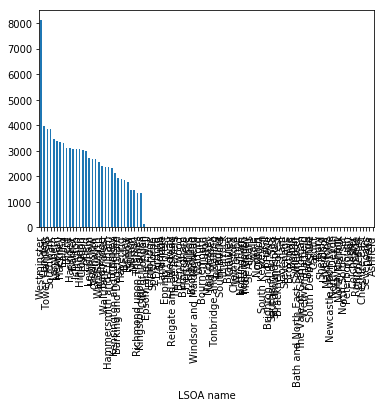

In [22]:
result1.plot(kind='bar')
"""

"""



In [23]:
def visualize(df,result):

    barchart = sns.barplot(data=result, x='LSOA name', y='Crime type')
    #plt.title("MAX CRIMES" + "\n", fontsize=16)
    return barchart

visualize(dfCrimes,result1)


ValueError: Could not interpret input 'LSOA name'

In [ ]:


    
    """
    data_filter = data[data['rnd_1'] <= 5]
    data[(data['rnd_2'] == 2) & (data['rnd_3'] > 15)]
    data.loc[2:4, ['rnd_2', 'fecha']]
    
    fecha_1 = dt.datetime(2013, 4, 14)
    fecha_2 = dt.datetime(2013, 4, 18)

    # Filtro por fecha
    data_fecha.loc[fecha_1: fecha_2]
    
    grouped = filtered.groupby('Make').agg({'Combined MPG':'mean'}).reset_index()
    results = grouped.sort_values('Combined MPG', ascending=False).head(10)
    return results
    """
    
    
def visualize(df):
    fig, ax = plt.subplots(figsize=(15,8))
    barchart = sns.barplot(data=results, x='Make', y='Combined MPG')
    plt.title(title + "\n", fontsize=16)
    return barchart

def save_viz(barchart):
    fig = barchart.get_figure()
    fig.savefig(title + '.png')


In [ ]:
grouped = dfCrimes.groupby(by = ['LSOA name','Crime type'])# ['Crime type'].count() 
type(grouped)

In [ ]:
grouped = dfCrimes.groupby(by = 'LSOA name')['Crime type'].count() 
type(grouped)
grouped[0]
print(grouped)
